# Hypergraphs and their Homology

Salisbury University 

December 8, 2022 

Christopher Potvin, Ph.D. Candidate, Michigan State University

## A Virus in a Fungus in a Plant

pic of hot grass

In [1]:
#Get packages
import hypernetx as hnx
import numpy as np
import itertools as it
import networkx as nx

### Examples of Hypergraphs



In [8]:
res = {'1': {'A','B', 'C'}, '2': {'C'}, '3': {'B','C','D'}, '4': {'B'}}
simple = {'1': {'A', 'B', 'C'}, '2': {'C'}, '3': {'A', 'B'}}
StoKex = {'1': {'A', 'B', 'C'}, '2': {'A', 'D', 'E'}, '3': {'C', 'E', 'F'}}
simcomp = {'1': {'A', 'B'}, '2': {'B', 'C'}, '3': {'A', 'C'}, '4': {'A'}, '5': {'B'}, '6':{'C'}}
bigedge = {'1': {'A','B','C','D','E'}}

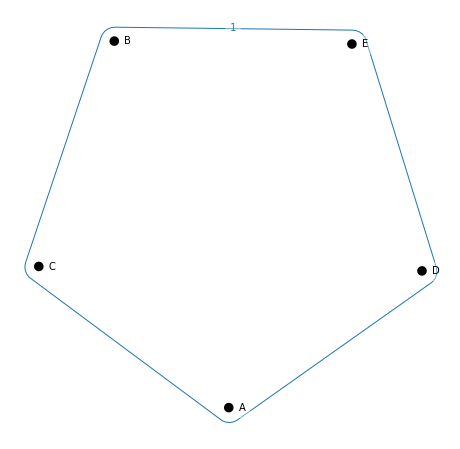

In [3]:
h = hnx.Hypergraph(bigedge)
hnx.draw(h)

### Studying Hypergraphs

Graphs - Connected Components, Cycles

But in higher dimensions?

## Homology

Homology is a tool from algebraic topology that counts "holes" in any dimension

It is also defined for a class of combinatorial objects called simplicial complexes

### Simplicial Complex

A simplicial complex is a hypergraph that is closed under taking subsets

geometrically realized as points, edges, triangles, tetrahedra

picture of triangle

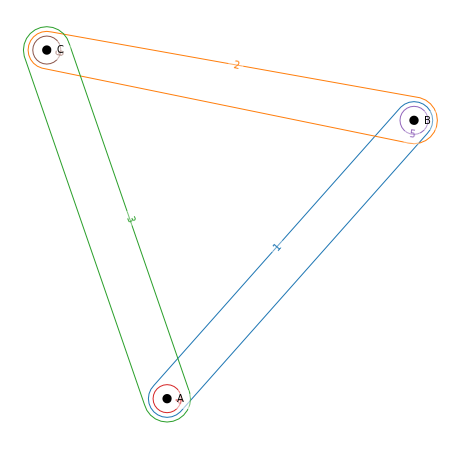

In [10]:
h = hnx.Hypergraph(simcomp)
hnx.draw(h)

### Simplicial Homology

the boundary of a simplex is the chains of elements in one less dimension that are incident on it

the boundary squares to 0

forms a chain complex, homology is defined as kernel/image of boundary map at each step

pic of my hollow triangle

### Hypergraph Homology - Where's the Boundary?

Unfortunately, hypergraph edges do not have a natural boundary map, since all subedges do not have to be present

my thesis mostly revolves around developing the theory for two alternative ways of forming simplicial complexes out of hypergraph

start by adding all subedges to get a simplicial complex, then take its barycentric subdivision

### Barycentric Subdivision

use hypergraph simple

vertices are simplices from K, simplices are given by chains of inclusions

kinda sucks to compute (hint shortcuts coming)

In [27]:
# This function computes the barycentric subdivision of the associated simplicial complex of a hypergraph.

def barycentricsubdivision(h):

    verts = set()
    edgetuples = []

    for e in h.incidence_dict.values():
        edgetuples.append(tuple(e))
    # Turns the edges into tuples since that is how they will come out of it.combinations

    for e in h.incidence_dict.values():
        verts.update([tuple(e)])
        # Adds the edges to the restricted barycentric subdivision
        for i in range(1,len(e)):
            for combo in set(it.combinations(e, i)):
                verts.update([tuple(combo)])
                #takes all length i subsets of the edge e and adds them to the vertex set of the barycentric subdivision

    Skeleton = nx.Graph()
    Skeleton.add_nodes_from(verts)
    # First builds a graph with the given vertex set. 
    

    for node1 in verts:
        for node2 in verts: 
            if node1 is not node2 and (node2, node1) not in Skeleton.edges():
                for r in range(len(node2)):
                    if node1 in it.combinations(node2, r):
                        Skeleton.add_edge(node1, node2)
    # compares every pair of two nodes to see if there should be an edge. Avoids adding loops and multiple edges, and then does add an edge if node1 is a subset of node2. This will happen when node1 is included in node2 as simplices in the associated simplicial complex.

    B = hnx.Hypergraph(list(nx.find_cliques(Skeleton)))
    # the barycentric subdivision is the clique complex of this 1-skeleton. This function returns only the maximal cliques.
    
    return B

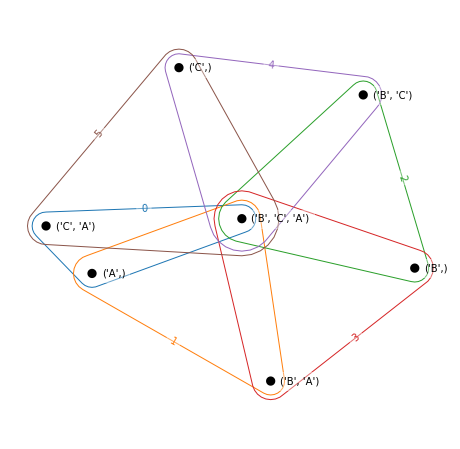

In [30]:
h = hnx.Hypergraph(simple)
B = barycentricsubdivision(h)

B
hnx.draw(B)